<a href="https://colab.research.google.com/github/Digaari/My-Experiments-With-Tensorflow-on-Time-Series/blob/master/Facebook_Prophet_Predicting_Future_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK #1: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [1]:
!pip install fbprophet

In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado.csv


In [7]:
# dataframes creation for both training and testing datasets 
avacado_df = pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [8]:
# Let's view the head of the training dataset
avacado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Let's view the last elements in the training dataset
avacado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# TASK #3: EXPLORE DATASET  

In [10]:
avacado_df = avacado_df.sort_values('Date')

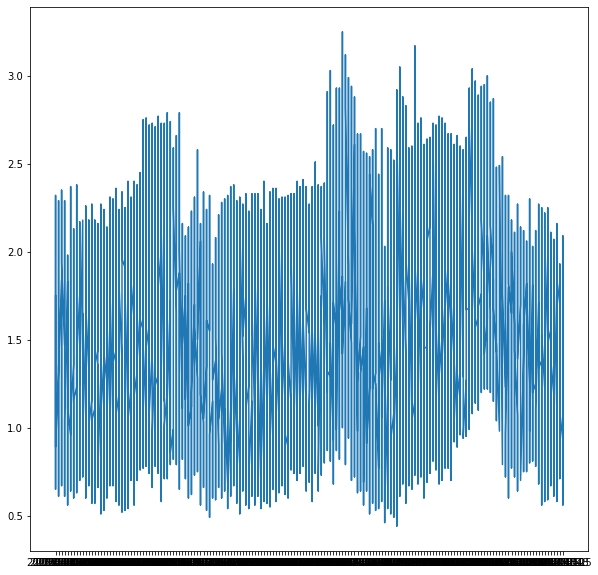

In [11]:
# Plot date and average price
plt.figure(figsize=(10,10))
plt.plot(avacado_df['Date'], avacado_df['AveragePrice'])

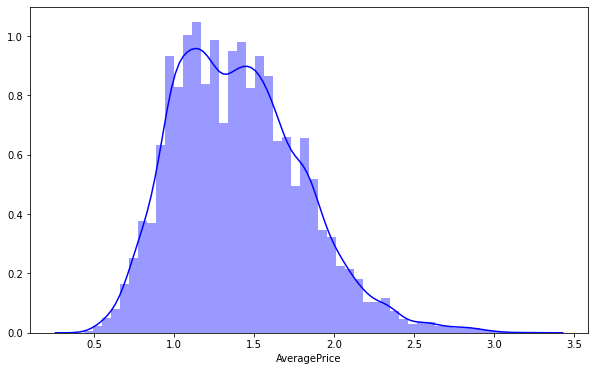

In [12]:
# Plot distribution of the average price
plt.figure(figsize= (10,6))
sns.distplot(avacado_df['AveragePrice'], color = 'b')

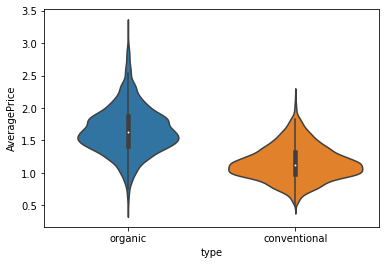

In [13]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y = 'AveragePrice', x = 'type', data = avacado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

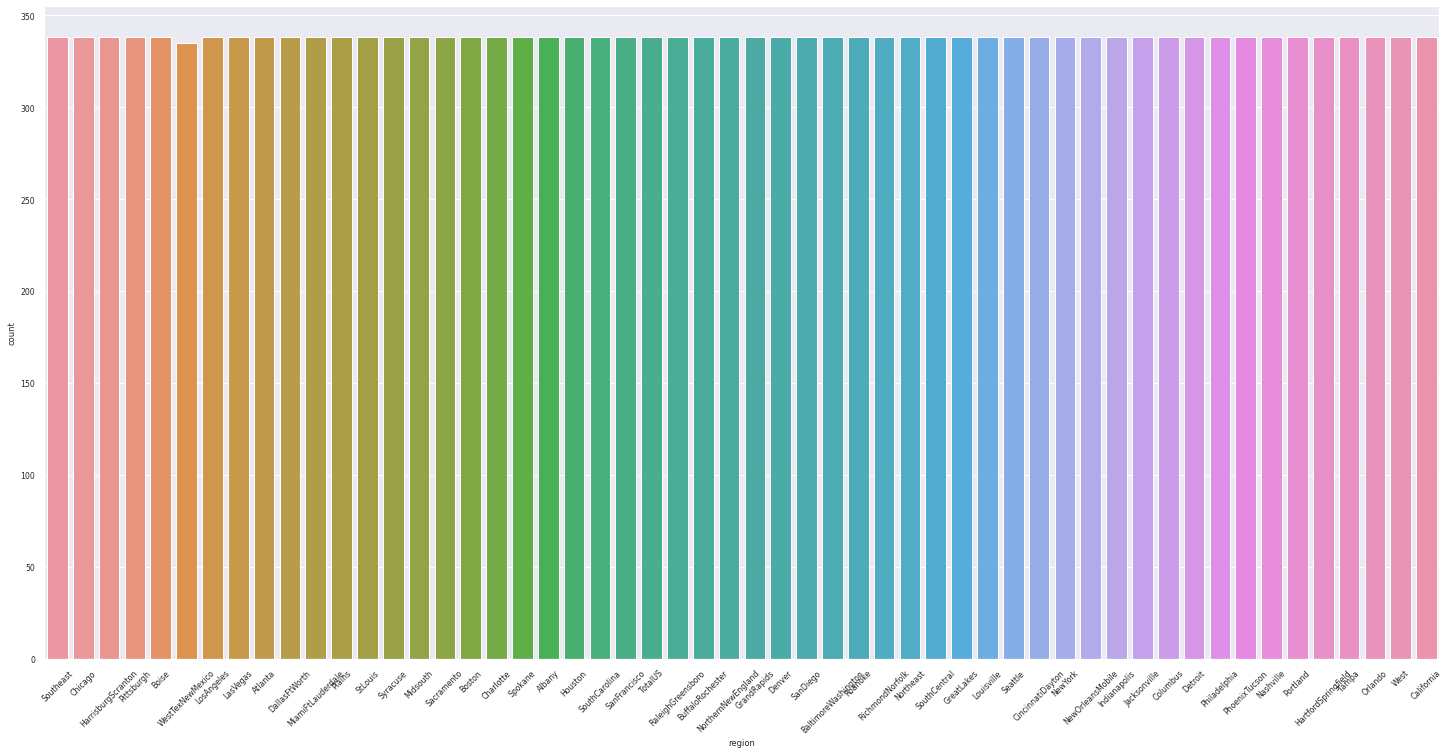

In [14]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avacado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

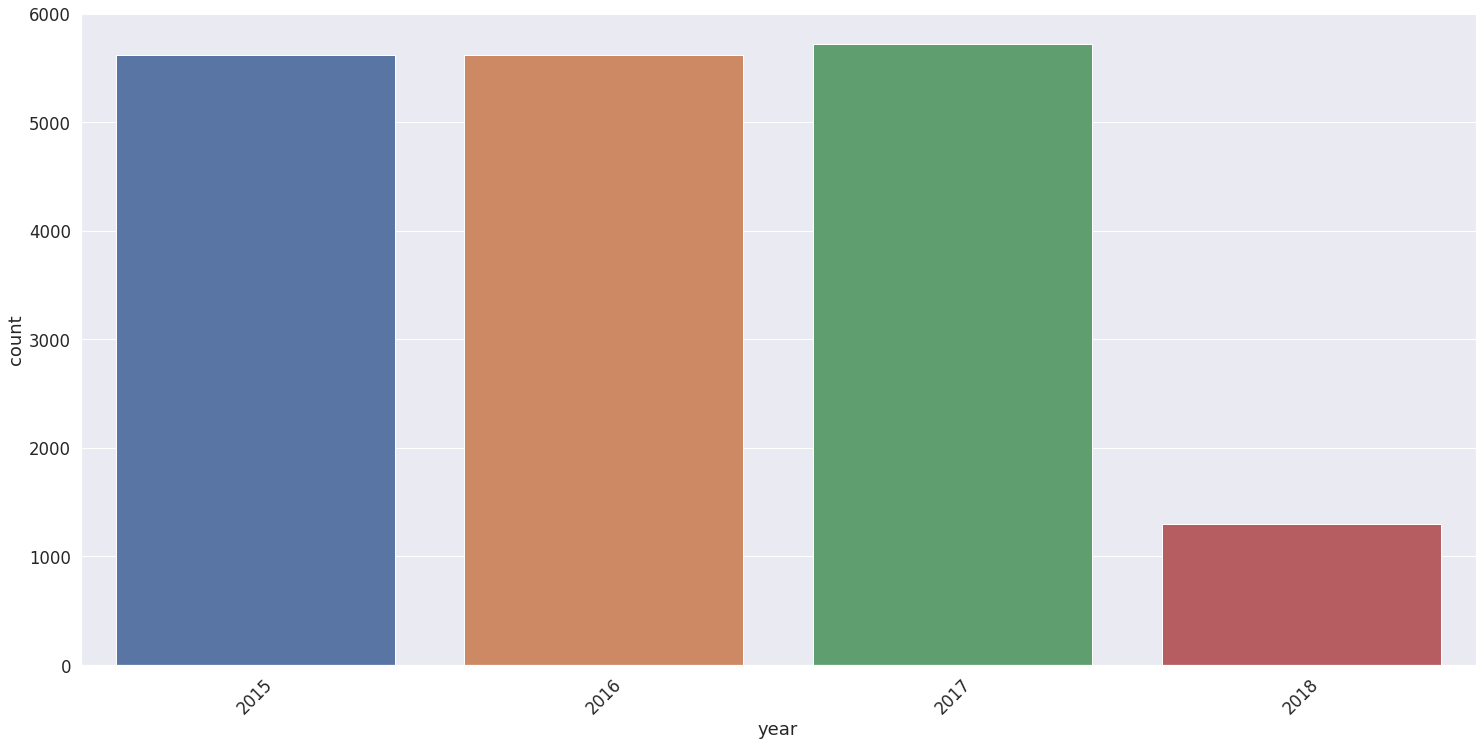

In [16]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avacado_df)
plt.xticks(rotation = 45)

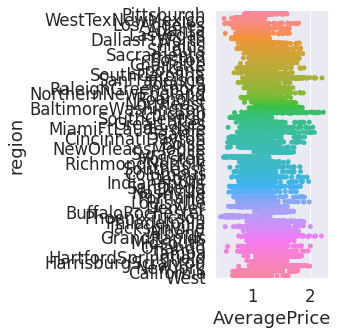

In [17]:
 # plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data = avacado_df[avacado_df['type']=='conventional'])

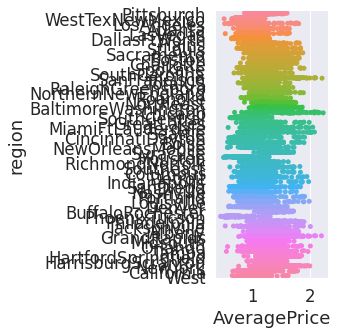

In [18]:
  # plot the avocado prices vs. regions for organic avocados
conventional = sns.catplot('AveragePrice', 'region', data = avacado_df[avacado_df['type']=='conventional'])

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [19]:
prophet_df = avacado_df[['Date','AveragePrice']]

In [20]:
prophet_df = prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [21]:
prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [23]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)


In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.889835,1.859317,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.918938,1.838943,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.919576,1.868127,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.884280,1.828969,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.875432,1.794777,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.534944,1.592178,0.964138,1.336385,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.558776,1.589313,0.962433,1.336647,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.551431,1.557248,0.960720,1.336934,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.563510,1.596557,0.958539,1.337075,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


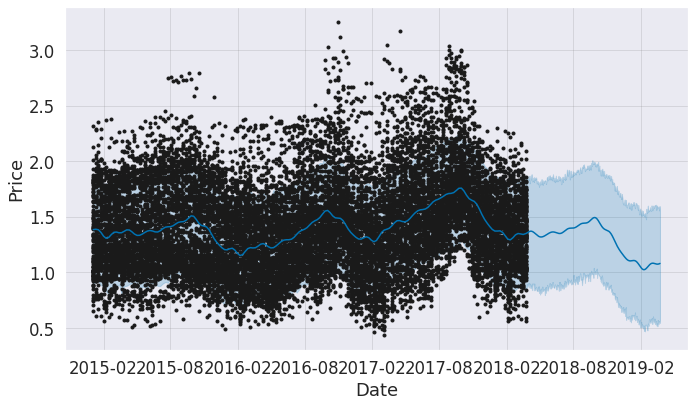

In [29]:
fig = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [30]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [32]:
# Select specific region
avocado_df_sample = avocado_df[avocado_df['region']=='Chicago']

In [33]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


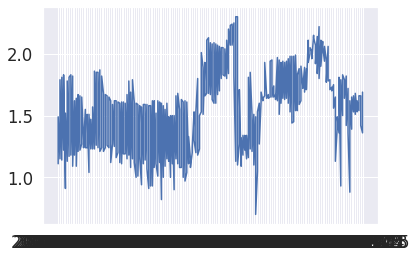

In [34]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [36]:
region_prophet_df = avocado_df_sample[['Date','AveragePrice']]

In [37]:
region_prophet_df = region_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [38]:
region_prophet_df

,ds,y
467,2015-01-04,1.11
9593,2015-01-04,1.49
466,2015-01-11,1.15
9592,2015-01-11,1.79
465,2015-01-18,1.14
...,...,...
17699,2018-03-11,1.66
17698,2018-03-18,1.66
8575,2018-03-18,1.42
8574,2018-03-25,1.36


In [40]:
m = Prophet()
m.fit(region_prophet_df)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


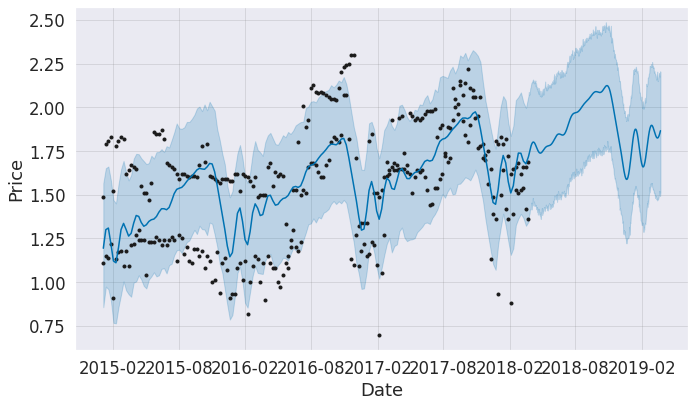

In [41]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

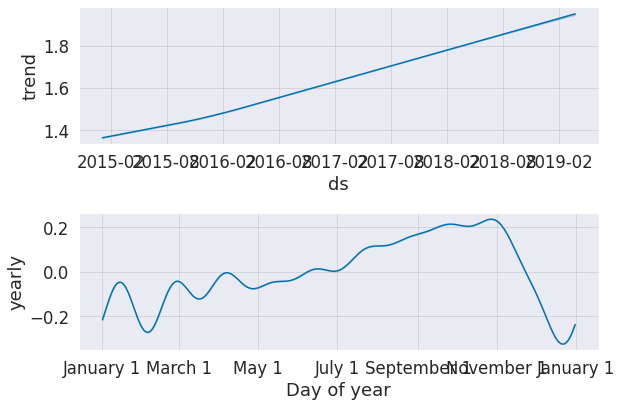

In [42]:
figure3 = m.plot_components(forecast)

# GREAT JOB!